#Libraries installation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from tqdm.notebook import tqdm

# Exercise 4.1.1

The three dimensionful parameters are:
* $J$: interaction strength between neighboring spins
* $h$: external magnetic field
* $β=1/T$: inverse temperature (where T is temperature in units where $k_{B}=1$)

One way to form dimensionless parameters is to consider ratios involving $J$, $h$ and $\beta$. So, our two dimensionless parameters are:
* $K=\beta J={\frac{J}{T}}$
* $u=\beta h={\frac{h}{T}}$

First, we rewrite the eigenvalues $\lambda_{\pm}$ in terms of $K$ and $u$:
$$\lambda_{\pm}=e^{K}\left(\cosh(u)\pm\sqrt{\sinh^{2}(u)+e^{-4K}}\right)$$
Using the new variables $K$ and $u$, the partition function can now be written as:
$$Z[\beta,J,h]=\lambda_{+}^{N}+\lambda_{-}^{N}=\left(e^{K}\left(\cosh(u)+{\sqrt{\sinh^{2}(u)+e^{-4K}}}\right)\right)^{N}+\left(e^{K}\left(\cosh(u)-{\sqrt{\sinh^{2}(u)+e^{-4K}}}\right)\right)^{N}$$

In conclusion, the exact result for the partition function in terms of the dimensionless parameters $K$ and $u$ is:
$$Z[K,u]=\left(e^{K}\left(\cosh(u)+{\sqrt{\sinh^{2}(u)+e^{-4K}}}\right)\right)^{N}+\left(e^{K}\left(\cosh(u)-{\sqrt{\sinh^{2}(u)+e^{-4K}}}\right)\right)^{N}$$

# Exercise 4.1.2

Starting with the definition of the expected net magnetization M:
$$\langle M\rangle=T{\frac{\partial}{\partial h}}\log Z[\beta,J,h]$$

Since $T=1/β$, this can be rewritten as:
$$\langle M\rangle=\frac{1}{\beta}\frac{\partial}{\partial h}\log Z[\beta,J,h]$$

With the dimensionless parameter $u=\beta h$, we can use the chain rule to rewrite the derivative with respect to $h$ in terms of $u$:
$${\frac{\partial}{\partial h}}={\frac{\partial u}{\partial h}}{\frac{\partial}{\partial u}}=\beta{\frac{\partial}{\partial u}}$$

So we have:
$$\langle M\rangle=\frac{1}{\beta}\cdot\beta\frac{\partial}{\partial u}\log Z[\beta,J,h]=\frac{\partial}{\partial u}\log Z[K,u]$$

Now we have to differentiate $\log{Z}[K,u]$ with respect to $u$. Since $Z=\log\left(\lambda_{+}^{N}+\lambda_{-}^{N}\right)$, we have:
$$\frac{\partial}{\partial u}\log Z[K,u]=\frac{1}{Z[K,u]}\frac{\partial Z[K,u]}{\partial u}$$

Now, we can compute $\frac{\partial Z}{\partial u}$:
$${\frac{\partial Z}{\partial u}}=N\lambda_{+}^{N-1}{\frac{\partial\lambda_{+}}{\partial u}}+N\lambda_{-}^{N-1}{\frac{\partial\lambda_{-}}{\partial u}}$$

We also compute $\frac{\partial \lambda_{\pm}}{\partial u}$:
$$\frac{\partial\lambda_{\pm}}{\partial u}=e^{K}\left(\sinh(u)\pm\frac{\sinh(u)\cosh(u)}{\sqrt{\sinh^{2}(u)+e^{-4K}}}\right)$$

Now, we are substituting our results into the definition of $\langle M\rangle$ and we have:
$$\frac{\delta Z}{\delta u}=N e^{K(N-1)}\left[\lambda_{+}^{N-1}\left(\sinh(u)+\frac{\sinh(u)\cosh(u)}{\sqrt{\sinh^{2}(u)+e^{-4K}}}\right)+\lambda_{-}^{N-1}\left(\sinh(u)-\frac{\sinh(u)\cosh(u)}{\sqrt{\sinh^{2}(u)+e^{-4K}}}\right)\right]$$

After simplification, our final result is:
$$\left\langle M\right\rangle=\frac{N e^{K(N-1)}}{\lambda_{+}^{N}+\lambda_{-}^{N}}\left[\lambda_{+}^{N-1}\left(\sinh(u)+\frac{\sinh(u)\cosh(u)}{\sqrt{\sinh^{2}(u)+e^{-4K}}}\right)+\lambda_{-}^{N-1}\left(\sinh(u)-\frac{\sinh(u)\cosh(u)}{\sqrt{\sinh^{2}(u)+e^{-4K}}}\right)\right].$$

#Exercise 4.1.3

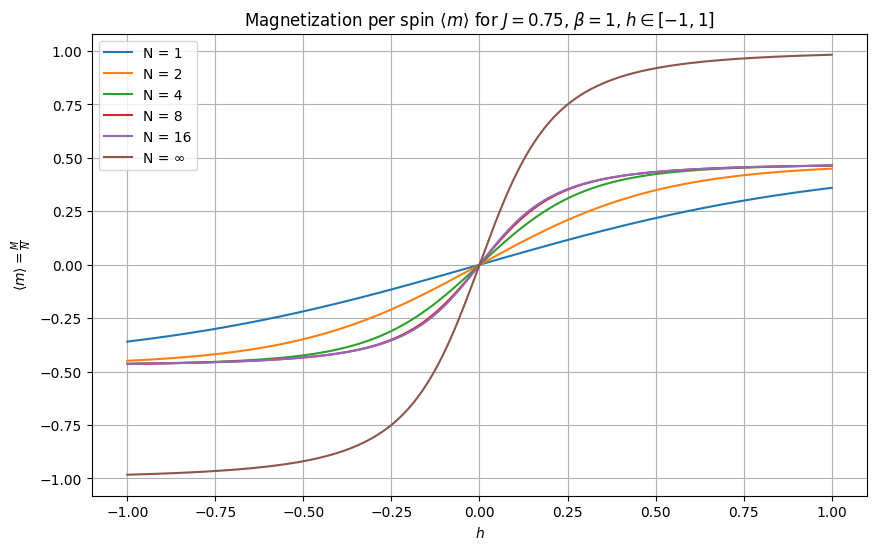

In [ ]:
# Parameters
J = 0.75
beta = 1.0
T = 1 / beta  # Since beta = 1/T
K = J / T     # Dimensionless interaction parameter
h_values = np.linspace(-1, 1, 200)
u_values = beta * h_values  # Dimensionless magnetic field parameter u = beta * h

# Function to compute exact m in the thermodynamic limit N -> infinity
def m_infinity(u, K):
    return np.sinh(u) / np.sqrt(np.sinh(u)**2 + np.exp(-4 * K))

# Function to compute m for finite N
def m_finite_N(u, K, N):
    lambda_plus = np.exp(K) * (np.cosh(u) + np.sqrt(np.sinh(u)**2 + np.exp(-4 * K)))
    lambda_minus = np.exp(K) * (np.cosh(u) - np.sqrt(np.sinh(u)**2 + np.exp(-4 * K)))

    Z_N = lambda_plus**N + lambda_minus**N
    m_N = (N / Z_N) * (lambda_plus**(N - 1) * (np.sinh(u) + np.sinh(u) * np.cosh(u) / np.sqrt(np.sinh(u)**2 + np.exp(-4 * K))) +
                       lambda_minus**(N - 1) * (np.sinh(u) - np.sinh(u) * np.cosh(u) / np.sqrt(np.sinh(u)**2 + np.exp(-4 * K))))
    return m_N / N  # Magnetization per spin

# Values of N for plotting
N_values = [1, 2, 4, 8, 16, np.inf]

# Prepare the plot
plt.figure(figsize=(10, 6))

# Plot m for each N
for N in N_values:
    if N == np.inf:
        m_values = m_infinity(u_values, K)  # Exact thermodynamic limit
        label = "N = ∞"
    else:
        m_values = [m_finite_N(u, K, N) for u in u_values]
        label = f"N = {N}"

    plt.plot(h_values, m_values, label=label)

# Plot formatting
plt.xlabel(r"$h$")
plt.ylabel(r"$\langle m \rangle = \frac{M}{N}$")
plt.title(r"Magnetization per spin $\langle m \rangle$ for $J=0.75$, $\beta=1$, $h \in [-1, 1]$")
plt.legend()
plt.grid(True)
plt.show()

# Exercise 4.1.4

In [ ]:
def S(spins,J̃,h̃):
    N = len(spins)
    s = 0
    for i in range(N):
        s+= -J̃*spins[i]*spins[(i+1) % N] - h̃*spins[i]
    return s


# Exercise 4.1.5

In [ ]:
def diffS(spins,J̃,h̃,x):
    N = len(spins)
    ΔS = 0
    ΔS += 2*J̃*spins[x]*spins[(x+1) % N] #interaction with right neighbour
    ΔS += 2*J̃*spins[x]*spins[x-1] #  #interaction with left neighbour
    ΔS += 2*h̃*spins[x]
    return ΔS

# Exercise 4.1.6

In [ ]:
J̃ = 0.75
h̃ = -1
t_action = []
t_ΔS = []
Ns = range(1,10000,100)
for N in Ns:
    spins = np.random.choice([-1,1],N)
    times = []
    for i in range(10):
        start = timer()
        S(spins,J̃,h̃)
        end = timer()
        times.append(end - start)
    t_action.append(np.mean(times))

    times = []
    for i in range(10):
        x = np.random.choice(range(N))
        start = timer()
        diffS(spins,J̃,h̃,x)
        end = timer()
        times.append(end - start)
    t_ΔS.append(np.mean(times))


#Exericse 4.1.7

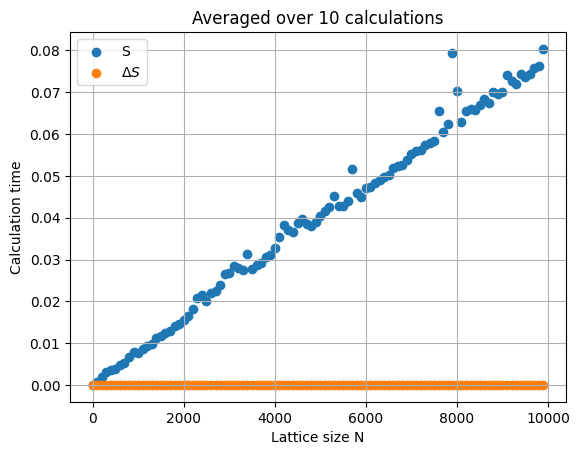

In [ ]:
plt.scatter(Ns, t_action,label="S")
plt.scatter(Ns, t_ΔS,label=r"$\Delta S$")
plt.xlabel("Lattice size N")
plt.ylabel("Calculation time")
plt.grid()
plt.title("Averaged over 10 calculations")
plt.legend()
plt.show()

In [ ]:
def perform_sweep(spins,J̃,h̃):
    N = len(spins)
    spin_indices_to_flip = np.arange(N)
    np.random.shuffle(spin_indices_to_flip)
    for index in spin_indices_to_flip:
        ΔS = diffS(spins,J̃,h̃,index)
        if ΔS <= 0:
            spins[index] = -spins[index]
        elif ΔS > 0 and (np.random.uniform() < np.exp(-ΔS)):
            spins[index] = -spins[index]
    return spins


In [ ]:
def generate_sample(spins,J̃,h̃,M):
    N = len(spins)
    samples = np.zeros((M,N))
    for m in range(M):
        samples[m,:] = perform_sweep(spins,J̃,h̃)
    return samples


# Sampling

In [ ]:
N=20
J̃ = 0.75
h̃s = np.linspace(-1,1,20)
M=10000
repetitions = 10

In [ ]:
magnetisations = np.zeros((repetitions,len(h̃s)))
for n in tqdm(range(repetitions)):
    for (i,h̃) in enumerate(h̃s):
        #print(h̃)
        spins = np.ones(N,dtype=int)
        sample = generate_sample(spins,J̃,h̃,M)
        mag = np.mean(np.sum(sample,axis=1),axis=0)/N
        magnetisations[n,i] = mag



Text(0, 0.5, '$\\langle m \\rangle $')

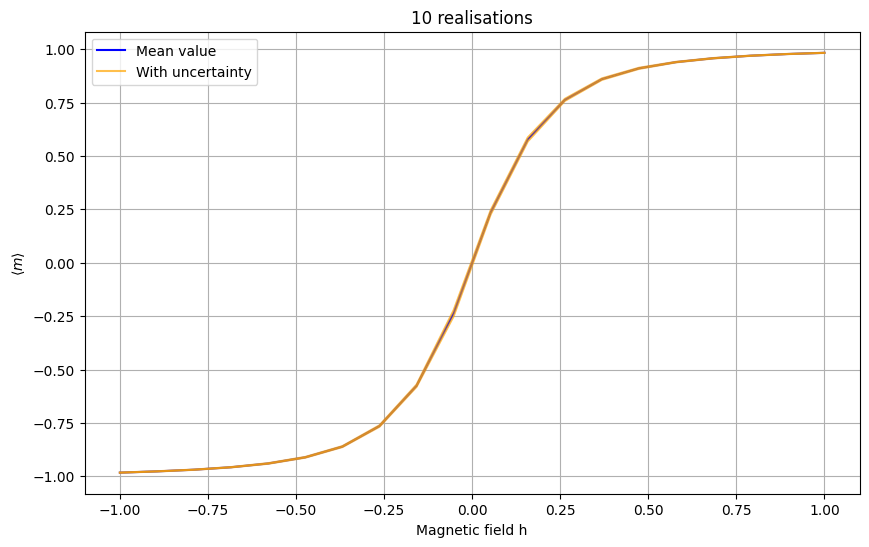

In [ ]:
mean_mag = np.mean(magnetisations,axis=0)
std_mag = np.std(magnetisations,axis=0)
plt.figure(figsize=(10,6))
plt.plot(h̃s,mean_mag,color = "blue",label="Mean value")
plt.plot(h̃s,mean_mag-std_mag,color="orange",alpha=0.7,label="With uncertainty")
plt.plot(h̃s,mean_mag+std_mag,color="orange",alpha=0.7)
plt.title("10 realisations")
#plt.errorbar(h̃s,mean_mag,std_mag)
plt.grid()
plt.legend()
plt.xlabel("Magnetic field h")
plt.ylabel(r"$\langle m \rangle $")